In [3]:
"""Build a predictive linear regression model for given dataset, train the model for training set and test
it against test dataset, plot the model using any plotting library."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.isnull().sum() #it will give you the total number of null values in particular column in this case there is only one null value in column y

x    0
y    1
dtype: int64

In [6]:
test_data.isnull().sum() #no null values in test data

x    0
y    0
dtype: int64

In [7]:
train_data.loc[train_data['y'].isnull()] #Since there is only 1 null value in y column using this loc function we can find where exactly is the null value

,x,y
213,3530.157369,NaN


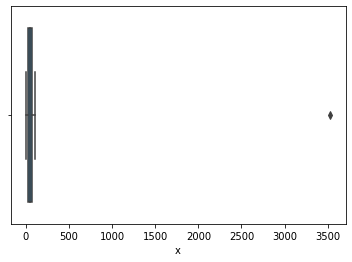

In [8]:
sb.boxplot(x = train_data['x'])
plt.show()

In [9]:
train_data.drop(train_data[train_data.x>3500].index,inplace = True) #since 3530.157 is an outlier we can drop it
x_train,y_train,x_test,y_test = train_data.iloc[:,0:1],train_data.iloc[:,-1:],test_data.iloc[:,0:1],test_data.iloc[:,-1:]

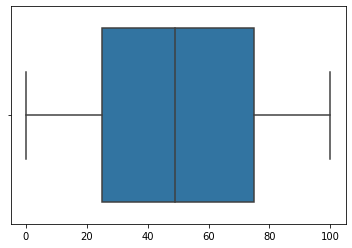

In [10]:
sb.boxplot(x = x_train)
plt.show()

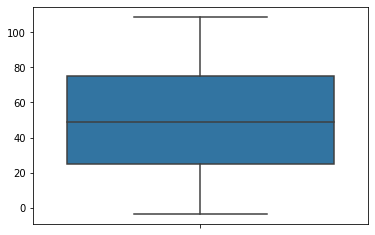

In [11]:
sb.boxplot(y = y_train)
plt.show()

In [12]:
x = np.array(x_train)
y = np.array(y_train)

In [13]:
def model(x,y):
    theta1 = 0
    theta2 = 0
    n = int(len(x))
    L = 0.0001 #Learning Rate
    epoch = 3000 #Number of iterations


    for i in range(epoch):
        for j in range(n):
            Y_pred = (theta1 + (theta2 * x[j]))
            D_theta_1 = (Y_pred - y[j]) #derivative of Theta1
            D_theta_2 = (x[j] * (Y_pred - y[j])) #Derivative of theta2
            D_theta_1 += D_theta_1 #summation of Derivative of theta1
            D_theta_2 += D_theta_2 #summation of Derivative of theta2
        
        theta1 = theta1 - ((L * D_theta_1) / n) #updating theta1
        theta2 = theta2 - ((L * D_theta_2) / n) #updating theta2
    
    return(theta1,theta2)

In [14]:
theta1,theta2 = model(x,y)

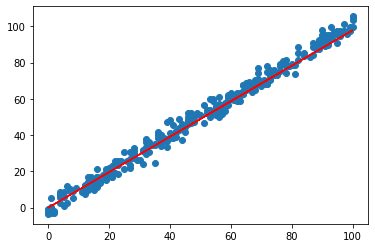

In [15]:
#Testing the model on test dataset
Y_prediction=theta1+(theta2*x_test)
plt.scatter(x_test['x'],y_test)
plt.plot(x_test['x'],Y_prediction,'r')
plt.show()

In [16]:
#Calculating the errors for gradient descent method

mse=np.mean(np.array((y_test.values-Y_prediction.values)**2))

In [17]:
rmse=np.sqrt(mse)
rmse

3.463049170181407

In [18]:
#testing the individual values of test data
x=[77,21,22,20]
for i in range(len(x)):
    Y_predictio=theta1+(theta2*x[i])
    print(Y_predictio)

[75.3716594]
[20.56324523]
[21.54196691]
[19.58452355]


In [19]:
#Linear Regression using Matrices
import numpy as np
X=np.array(x_train)
Y=np.array(y_train)
inverse=np.linalg.inv(np.dot(X.T,X))
product=np.dot(inverse,X.T)
theta=np.dot(product,Y)
theta

array([[0.99904948]])

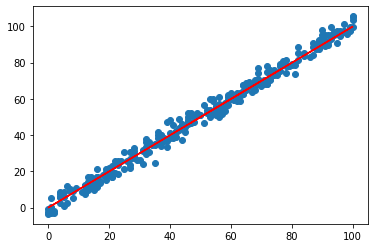

In [20]:
y_prediction=(x_test)*theta
plt.scatter(x_test['x'],y_test)
plt.plot(x_test['x'],y_prediction,'r')
plt.show()